# ML mini project 1: Sonar Data

In this project, we are given a small data set containing sonar scans and their corresponding labels. The task is to build a model to predict those labels.

## Setup: Installing required modules

Throughout the course of this small project, a few external modules. The script below does this using pip.

In [ ]:
%pip install -r requirements.txt


## Understanding the data

Let's first load the data into the script and see the labels we have.

In [2]:
import pandas as pd

full_data: pd.DataFrame = pd.read_csv('./sonar.csv', header=None)

print("Labels:", str(full_data[60].unique()))
full_data


Labels: ['R' 'M']


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
print("Proportion of non-zero data:", str(full_data.iloc[:, :60].astype(pd.SparseDtype("int", 0)).sparse.density))


Proportion of non-zero data: 0.9992788461538462


We now know that the data set contains a total of 207 instances of sonar scans. Each instance contains 60 readings (floating point numbers) and their corresponding labels. Since this is a binary classification problem, it seems like Logistic Regression might be the best choice. On top of that, now that we saw that the data is not very sparse, we know that l1 regularization might not be the best choice. 

With all that in mind, since the readings are unlabeled, there is no way to know what each number represents. Therefore, any further data analysis would be based off numbers alone and completely speculative to the meaning of the data, so it will not be conducted.

## Formatting the Data and Training the Model

The first step to the training is to separate the data from the labels as such.

In [4]:
import numpy as np

label_map: dict[str, np.uint8] = {'R': np.uint8(0), 'M': np.uint8(1)}

data: pd.DataFrame = full_data.drop(columns=[60])
labels: pd.Series = full_data[60].map(label_map)

del full_data, label_map

print(data.info(), end='\n\n')
labels.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

array([0, 1], dtype=uint8)

Now that we have done that, we need to split the data into a training and test set.

In [5]:
from sklearn.model_selection import train_test_split

# Defining a random seed for reproducible output
SEED: int = 11062024

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=SEED)

del data, labels

# Checking data integrity
print(train_labels.value_counts(normalize=True), end='\n\n')
print(test_labels.value_counts(normalize=True))


1    0.531034
0    0.468966
Name: 60, dtype: float64

1    0.539683
0    0.460317
Name: 60, dtype: float64


As shown abover, the data is now properly formatted and the label proportions are consistent, so we can proceed to model training. As stated before, the model of choice is Logistic Regression for this scenario.

### Hyperparameter Tuning

While we know that Logistic Regression will work well and we will also benefit from l2 regularization, there are two hyperparameters that require testing to find: Regularization strength and which solver works better. Below we explore which parameters work best with this data set.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid: dict[str, list[float | int | str]] = {
    'C': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
    'solver': ['liblinear', 'lbfgs']
}

grid_search: GridSearchCV = GridSearchCV(LogisticRegression(random_state=SEED), param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_data, train_labels)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {round(grid_search.best_score_, 2)}")

model:LogisticRegression = grid_search.best_estimator_

del param_grid, grid_search

model


Best parameters: {'C': 32, 'solver': 'lbfgs'}
Best cross-validation score: 0.75


LogisticRegression(C=32, random_state=11062024)

And, just like that, the model is ready. Next we will test the fitted model.

## Testing

### Training Data Performance

In [7]:
from sklearn.metrics import classification_report

train_prediction: np.ndarray = model.predict(train_data)
LABELS: list[str] = ['R', 'M']
print(classification_report(train_labels, train_prediction, target_names=LABELS))


              precision    recall  f1-score   support

           R       0.88      0.88      0.88        68
           M       0.90      0.90      0.90        77

    accuracy                           0.89       145
   macro avg       0.89      0.89      0.89       145
weighted avg       0.89      0.89      0.89       145



The model performs well on the training data, achieving an accuracy of 89%. Precision and recall are balanced for both classes (R: 0.88, M: 0.90), resulting in F1-scores of 0.88 and 0.90, respectively. These metrics indicate the model effectively distinguishes between the two classes without overfitting.

### Testing Data Performance

In [8]:
test_prediction: np.ndarray = model.predict(test_data)

print(classification_report(test_labels, test_prediction, target_names=LABELS))


              precision    recall  f1-score   support

           R       0.73      0.76      0.75        29
           M       0.79      0.76      0.78        34

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63



The model achieves an accuracy of 76% on the test data, showing moderate generalization. Precision and recall are balanced for both classes (R: 0.73, M: 0.79), resulting in F1-scores of 0.75 and 0.78, respectively. While performance is consistent across classes, slight room for improvement remains in identifying both classes.

### Confusion Matrix Analysis

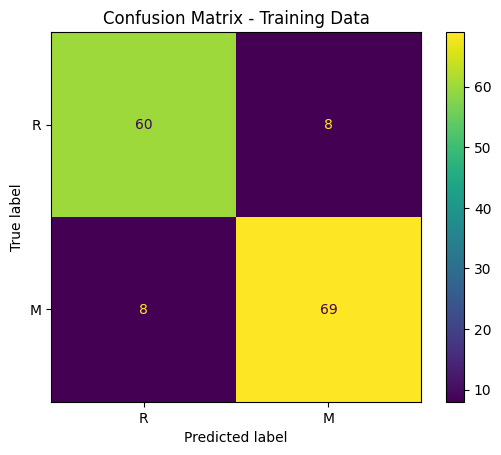

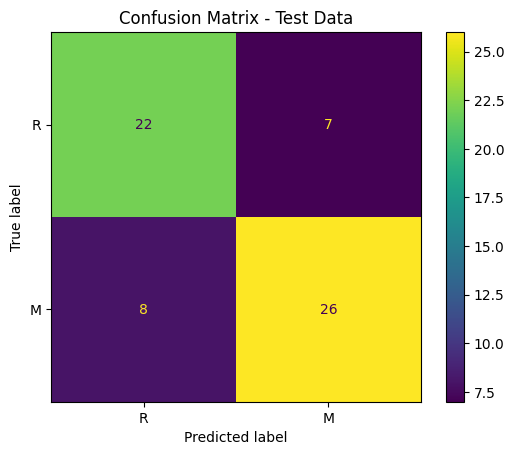

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Training data confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model, train_data, train_labels, display_labels=LABELS
)
plt.title("Confusion Matrix - Training Data")
plt.show()

# Test data confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model, test_data, test_labels, display_labels=LABELS
)
plt.title("Confusion Matrix - Test Data")
plt.show()


As shown by the confusion matrices, the model accurately classifies most instances in the training data, with only 8 misclassifications for each class. It demonstrates balanced performance, correctly predicting 60 instances of class R and 69 of class M.

On the test data, the model shows balanced performance but with slightly more misclassifications. It correctly identifies 22 instances of class R and 26 of class M, with 15 total misclassifications. This highlights areas where the model could improve in generalization.

### ROC and AUC Analysis 

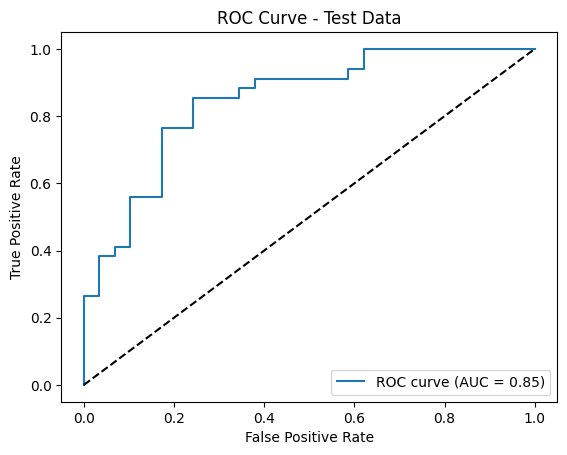

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for test data
test_probs: np.ndarray = model.predict_proba(test_data)[:, 1]
fpr, tpr, _ = roc_curve(test_labels, test_probs)
roc_auc: float = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Data")
plt.legend(loc="lower right")
plt.show()

del test_probs, fpr, tpr, _, roc_auc, LABELS, SEED, test_data, test_labels, test_prediction, train_data, train_labels, train_prediction

The ROC curve illustrates the trade-off between true positive and false positive rates across various thresholds. The model achieves an AUC of 0.85, indicating good discriminatory ability. This suggests that the model is effective at distinguishing between the two classes on the test data.

## Exporting the model

The code below saves the trained model (`model`) to a file named `sonar.pkl` using `joblib`. This allows the model to be reused without retraining. To reload the model later, use `joblib.load('sonar.pkl')`.

In [11]:
import joblib

"""
To load the model later, use
>>> loaded_model = joblib.load('sonar.pkl')
"""
joblib.dump(model, 'sonar.pkl')

del model


## Conclusion

The Logistic Regression model performed well on the sonar dataset, achieving solid metrics on both the training and test data. With an accuracy of 76% and an AUC of 0.85 on the test data, the model demonstrates good generalization and reliable class distinction. Further improvements, such as feature engineering or hyperparameter tuning, could enhance performance even further.